# Assingment 1 : Understanding the impact of COVID-19 cases on investor sentiments in the S&P 500

In early 2020, the rise of COVID-19 cases has been reported to cause a drastic change in  investing patterns, leading to changes in stock prices and trading volumes. For example, during an increase in COVID cases, it was reported that stocks within the travel industry fell, and stocks within the tech industry rose. <br>


Drastic changes in  investing patterns are often related to changed investor sentiments for a particular industry/stock due external market events. . With this in mind, this notebook will attempt to answer the below <b>business question <b>:
<br><br>
<b><i> How does the change in COVID cases impact investor sentiment relayed by investing patterns and what is the resultant impact on the stock market?

BRK.B
BSX
GD
BF.B are excluded

I have broken down the business question into 2 key parts:<br>
1) Understand the impact on investor sentiment and investing patterns to changes in COVID 19 cases across different industries and stocks <br>
2) Understand the impact on investor sentiment and investing patterns to changes in COVID 19 cases on market volatility and trading volume <br>

###  Answers to business questions

<b> Question 1: Understand the impact on investor sentiment and investing patterns to changes in COVID 19 cases across different industries and stocks

- The energy, industrials, consumer discretionary, financials  show high volatility during the pandemic <br>
- The materials, utilities, real estate and information technology sectors are fairly stable with less volatiltiy <br>
- The consumer services and consumer staples sectors show stability, with low volatility <br>
- The health care sector returns are also fairly stable, which is an interesting observation as the news of the COVID vaccine should have caused some volatility <br>
<br>

From the above, we can clearly see that how the 'survivability' of the sector during a pandemic affected investor trasing patterns. Sectors that relied on consumer activity were negatively impacted due to the lockdowns implemented

<b> Question 2: Understand the impact on investor sentiment and investing patterns to changes in COVID 19 cases on market volatility and trading volume

The main observation that was discovered was that: 
- Increase in COVID 19 cases do not cause a specific directional impact in investor trading patterns but instead causes panice, resulting in more volatile trading activity
- However, it was also observed that this panic does exist throughout the year. We can instead see investors getting accustomed to the spikes in COVID 19 cases, to a point that even with increasingly larger spikes, volatility was actually observed to decrease

### Preparing the dataset

For this assignment, I have used data from the S&P 500 (USA stock index) and we will therefore be understanding the impact on investors in the S&P 500 (both US and non-US investors). To create the dataset, I have combined: <br>
- S&P 500 data for all stocks from Yahoo finance from 1/1/2020 to 13/1/2021 <br>
- COVID-19 case number dataset provided by Kaggle

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [26]:
plt.rcParams['figure.figsize'] = [20, 10]

In [5]:
sp500 = pd.read_csv('E:/IOD_data/sp500.csv')
sp500

,Symbol,Name,Sector
0,AAPL,Apple Inc.,Information Technology
1,MSFT,Microsoft Corporation,Information Technology
2,AMZN,Amazon.com Inc.,Consumer Discretionary
3,TSLA,Tesla Inc,Consumer Discretionary
4,FB,Facebook Inc. Class A,Communication Services
...,...,...,...
496,HFC,HollyFrontier Corporation,Energy
497,XRX,Xerox Holdings Corporation,Information Technology
498,UAA,Under Armour Inc. Class A,Consumer Discretionary
499,UA,Under Armour Inc. Class C,Consumer Discretionary


In [6]:
stock_ticker = sp500['Symbol']
stock_ticker = stock_ticker.tolist()

In [7]:


master = pd.DataFrame(columns = ['Open', 'High','Low', 'Close', 'Volume', 'Dividends', 'Stock Splits', 'Symbol', 'Sector', 'Industry'])

for i in stock_ticker:
    stock = yf.Ticker(i)
    x = stock.history(start = '2020-01-22', end = '2021-12-06')
    x['Symbol'] = i 
    master = pd.concat([x, master])

In [8]:
master_list = master.reset_index()
master_list

,index,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Sector,Industry
0,2020-01-21,14.818301,14.837979,14.493596,14.601831,612200,0.0,0.0,NWS,NaN,NaN
1,2020-01-22,14.591992,14.710066,14.513276,14.552634,544900,0.0,0.0,NWS,NaN,NaN
2,2020-01-23,14.414880,14.582152,14.375522,14.473918,434800,0.0,0.0,NWS,NaN,NaN
3,2020-01-24,14.454239,14.454239,14.109857,14.119697,899600,0.0,0.0,NWS,NaN,NaN
4,2020-01-27,13.952425,14.060659,13.824511,13.873709,639000,0.0,0.0,NWS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
124392,2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0,0.0,AAPL,NaN,NaN
124393,2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0,0.0,AAPL,NaN,NaN
124394,2021-01-11,129.190002,130.169998,128.500000,128.979996,100620900,0.0,0.0,AAPL,NaN,NaN
124395,2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100,0.0,0.0,AAPL,NaN,NaN


In [9]:
master_list = master_list.rename(columns = {'index':'Date','Company': 'Symbol'})
master_list

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Sector,Industry
0,2020-01-21,14.818301,14.837979,14.493596,14.601831,612200,0.0,0.0,NWS,NaN,NaN
1,2020-01-22,14.591992,14.710066,14.513276,14.552634,544900,0.0,0.0,NWS,NaN,NaN
2,2020-01-23,14.414880,14.582152,14.375522,14.473918,434800,0.0,0.0,NWS,NaN,NaN
3,2020-01-24,14.454239,14.454239,14.109857,14.119697,899600,0.0,0.0,NWS,NaN,NaN
4,2020-01-27,13.952425,14.060659,13.824511,13.873709,639000,0.0,0.0,NWS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
124392,2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0,0.0,AAPL,NaN,NaN
124393,2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0,0.0,AAPL,NaN,NaN
124394,2021-01-11,129.190002,130.169998,128.500000,128.979996,100620900,0.0,0.0,AAPL,NaN,NaN
124395,2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100,0.0,0.0,AAPL,NaN,NaN


In [10]:
master_stock_list = pd.merge(master_list,sp500, on ='Symbol')

In [11]:
master_stock_list

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Sector_x,Industry,Name,Sector_y
0,2020-01-21,14.818301,14.837979,14.493596,14.601831,612200,0.0,0.0,NWS,NaN,NaN,News Corporation Class B,Communication Services
1,2020-01-22,14.591992,14.710066,14.513276,14.552634,544900,0.0,0.0,NWS,NaN,NaN,News Corporation Class B,Communication Services
2,2020-01-23,14.414880,14.582152,14.375522,14.473918,434800,0.0,0.0,NWS,NaN,NaN,News Corporation Class B,Communication Services
3,2020-01-24,14.454239,14.454239,14.109857,14.119697,899600,0.0,0.0,NWS,NaN,NaN,News Corporation Class B,Communication Services
4,2020-01-27,13.952425,14.060659,13.824511,13.873709,639000,0.0,0.0,NWS,NaN,NaN,News Corporation Class B,Communication Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124392,2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0,0.0,AAPL,NaN,NaN,Apple Inc.,Information Technology
124393,2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0,0.0,AAPL,NaN,NaN,Apple Inc.,Information Technology
124394,2021-01-11,129.190002,130.169998,128.500000,128.979996,100620900,0.0,0.0,AAPL,NaN,NaN,Apple Inc.,Information Technology
124395,2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100,0.0,0.0,AAPL,NaN,NaN,Apple Inc.,Information Technology


In [12]:
master_stock_list = master_stock_list.drop(columns = ['Sector_x'])

In [13]:
master_stock_list

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Industry,Name,Sector_y
0,2020-01-21,14.818301,14.837979,14.493596,14.601831,612200,0.0,0.0,NWS,NaN,News Corporation Class B,Communication Services
1,2020-01-22,14.591992,14.710066,14.513276,14.552634,544900,0.0,0.0,NWS,NaN,News Corporation Class B,Communication Services
2,2020-01-23,14.414880,14.582152,14.375522,14.473918,434800,0.0,0.0,NWS,NaN,News Corporation Class B,Communication Services
3,2020-01-24,14.454239,14.454239,14.109857,14.119697,899600,0.0,0.0,NWS,NaN,News Corporation Class B,Communication Services
4,2020-01-27,13.952425,14.060659,13.824511,13.873709,639000,0.0,0.0,NWS,NaN,News Corporation Class B,Communication Services
...,...,...,...,...,...,...,...,...,...,...,...,...
124392,2021-01-07,128.360001,131.630005,127.860001,130.919998,109578200,0.0,0.0,AAPL,NaN,Apple Inc.,Information Technology
124393,2021-01-08,132.429993,132.630005,130.229996,132.050003,105158200,0.0,0.0,AAPL,NaN,Apple Inc.,Information Technology
124394,2021-01-11,129.190002,130.169998,128.500000,128.979996,100620900,0.0,0.0,AAPL,NaN,Apple Inc.,Information Technology
124395,2021-01-12,128.500000,129.690002,126.860001,128.800003,91951100,0.0,0.0,AAPL,NaN,Apple Inc.,Information Technology


In [14]:
covid_19 = pd.read_csv("E:/IOD_data/covid_19/covid_19_data.csv")

In [15]:
covid_19

,SNo,Date,Province/State,Country/Region,Confirmed US cases,Confirmed non-US cases,Total cases,Confirmed US deaths,Confirmed non-US deaths,Confirmed US recoveries,Confirmed non-US recoveries,Last Update
0,1,1/22/2020,Anhui,Non-US,0,1,1,0,0,0,0,1/22/2020 17:00
1,2,1/22/2020,Beijing,Non-US,0,14,14,0,0,0,0,1/22/2020 17:00
2,3,1/22/2020,Chongqing,Non-US,0,6,6,0,0,0,0,1/22/2020 17:00
3,4,1/22/2020,Fujian,Non-US,0,1,1,0,0,0,0,1/22/2020 17:00
4,5,1/22/2020,Gansu,Non-US,0,0,0,0,0,0,0,1/22/2020 17:00
...,...,...,...,...,...,...,...,...,...,...,...,...
172475,172476,12/6/2020,Zaporizhia Oblast,Non-US,0,36539,36539,0,337,0,6556,12/7/2020 5:26
172476,172477,12/6/2020,Zeeland,Non-US,0,6710,6710,0,104,0,0,12/7/2020 5:26
172477,172478,12/6/2020,Zhejiang,Non-US,0,1295,1295,0,1,0,1288,12/7/2020 5:26
172478,172479,12/6/2020,Zhytomyr Oblast,Non-US,0,31967,31967,0,531,0,22263,12/7/2020 5:26


In [16]:
cov = covid_19.drop(columns =['SNo','Province/State', 'Country/Region'])
cov_grouped = cov.groupby('Date').sum()
cov_grouped = cov_grouped.reset_index()
cov_grouped["Date"] = pd.to_datetime(cov_grouped["Date"])
cov_grouped["Date"].max()

Timestamp('2020-12-06 00:00:00')

In [17]:
cov_grouped

,Date,Confirmed US cases,Confirmed non-US cases,Total cases,Confirmed US deaths,Confirmed non-US deaths,Confirmed US recoveries,Confirmed non-US recoveries
0,2020-01-22,1,554,555,0,17,0,28
1,2020-01-23,1,652,653,0,18,0,30
2,2020-01-24,2,939,941,0,26,0,36
3,2020-01-25,2,1436,1438,0,42,0,39
4,2020-01-26,5,2113,2118,0,56,0,52
...,...,...,...,...,...,...,...,...
315,2020-09-05,6247538,20656451,26903989,188546,691161,2302187,15622469
316,2020-09-06,6279314,20857152,27136466,188950,694805,2315995,15829977
317,2020-09-07,6303477,21061760,27365237,189217,703658,2333551,15998892
318,2020-09-08,6330007,21273685,27603692,189660,708114,2359111,16172978


In [18]:
cov_grouped = cov_grouped.sort_values(by =['Date'])

In [19]:
stocks_covid = pd.merge(cov_grouped,master_stock_list, on = 'Date')

In [20]:
stocks_covid = stocks_covid.sort_values(by = ['Date'])

In [83]:
stocks_covid

,Date,Confirmed US cases,Confirmed non-US cases,Total cases,Confirmed US deaths,Confirmed non-US deaths,Confirmed US recoveries,Confirmed non-US recoveries,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Industry,Name,Sector_y
0,2020-01-22,1,554,555,0,17,0,28,14.591992,14.710066,14.513276,14.552634,544900,0.0,0.0,NWS,NaN,News Corporation Class B,Communication Services
339,2020-01-22,1,554,555,0,17,0,28,112.619933,113.888247,112.530056,112.939507,2423100,0.0,0.0,EA,NaN,Electronic Arts Inc.,Communication Services
338,2020-01-22,1,554,555,0,17,0,28,80.964662,81.448784,80.441808,80.499901,2410600,0.0,0.0,SYY,NaN,Sysco Corporation,Consumer Staples
337,2020-01-22,1,554,555,0,17,0,28,274.890015,281.799988,274.890015,279.309998,832500,0.0,0.0,ALGN,NaN,Align Technology Inc.,Health Care
336,2020-01-22,1,554,555,0,17,0,28,65.860001,67.489998,65.419998,66.760002,8734600,0.0,0.0,CNC,NaN,Centene Corporation,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110532,2020-12-04,14367462,51531979,65899441,278932,1239738,5470389,36881632,280.250000,289.899994,276.559998,279.540009,2707400,0.0,0.0,ULTA,NaN,Ulta Beauty Inc,Consumer Discretionary
110531,2020-12-04,14367462,51531979,65899441,278932,1239738,5470389,36881632,103.330002,105.209999,103.330002,104.190002,1370200,0.0,0.0,AKAM,NaN,Akamai Technologies Inc.,Information Technology
110530,2020-12-04,14367462,51531979,65899441,278932,1239738,5470389,36881632,27.900000,29.080000,27.850000,28.950001,7880300,0.0,0.0,FE,NaN,FirstEnergy Corp.,Utilities
110543,2020-12-04,14367462,51531979,65899441,278932,1239738,5470389,36881632,48.697332,49.153095,48.390186,49.004475,1892900,0.0,0.0,VTR,NaN,Ventas Inc.,Real Estate


In [86]:
stocks_covid.to_csv('E:/IOD_data/stocks_covid_2.csv', index = False, header = True)

###  Data cleaning

In [65]:
df = pd.read_csv('E:/IOD_data/stocks_covid.csv')
covid_daily = pd.read_csv('E:/IOD_data/COVID_daily.csv')

In [66]:
covid_daily.sample(10)

,Date,Confirmed US cases,US_cases_daily_change,Confirmed non-US cases,non_US_daily_change
50,4/2/2020,243737,30229,769946,50432
73,5/6/2020,1228708,24238,2526675,68442
142,8/13/2020,5250723,51557,15672859,224489
216,11/27/2020,13088821,316168,48598880,937463
61,4/20/2020,784415,84702,1688333,147583
175,9/30/2020,7240174,42487,26772633,284587
35,3/12/2020,1663,382,126666,2097
179,10/6/2020,7508860,44131,28342322,285983
114,7/6/2020,2936159,195060,8684541,554182
11,2/6/2020,12,0,30806,3182


In [29]:
df.sample(10)

,Date,Confirmed US cases,US_cases_daily_change,Confirmed non-US cases,non_US_daily_change,Total cases,Confirmed US deaths,Confirmed non-US deaths,Confirmed US recoveries,Confirmed non-US recoveries,...,Low,Close,Return,Volume,Dividends,Stock Splits,Symbol,Industry,Name,Sector_y
91911,9/22/2020,6902311,39867,24743597,244873,31645908,200974,770398,2646959,19080221,...,56.945777,57.949661,-0.0226,3397000,0.0,0.0,STT,NaN,State Street Corporation,Financials
69707,7/21/2020,3899641,64563,11048773,175092,14948414,142012,474487,1182018,7285486,...,206.986430,207.702820,0.0077,38105800,0.0,0.0,MSFT,NaN,Microsoft Corporation,Information Technology
88928,5/5/2020,1204470,24000,2458233,55649,3662703,71064,186177,189791,1009137,...,28.213460,28.865452,0.0709,1994200,0.0,0.0,SEE,NaN,Sealed Air Corporation,Materials
84991,7/29/2020,4427923,71387,12602451,266802,17030374,150767,516344,1389425,8570087,...,49.619999,51.000000,-0.0106,4947500,0.0,0.0,RCL,NaN,Royal Caribbean Group,Consumer Discretionary
7066,10/13/2020,7867424,53042,30309225,275689,38176649,216078,870636,3124593,23376939,...,105.314081,105.993011,0.0003,636200,0.0,0.0,AME,NaN,AMETEK Inc.,Industrials
68789,6/8/2020,1961728,58585,5157608,289963,7119336,111014,295538,518522,2774847,...,79.302454,81.012611,0.0008,9500800,0.0,0.0,MRK,NaN,Merck & Co. Inc.,Health Care
36261,7/7/2020,2996826,60667,8833943,149402,11830769,131490,412697,936476,5510648,...,110.794998,112.209999,-0.0068,2954900,0.0,0.0,ETSY,NaN,Etsy Inc.,Consumer Discretionary
76345,6/18/2020,2191613,27536,6298099,111313,8489712,118440,335554,599115,3556120,...,33.328440,34.097630,-0.0462,4244400,0.0,0.0,OKE,NaN,ONEOK Inc.,Energy
69244,6/23/2020,2347878,35244,6916567,130124,9264445,121231,356358,647548,3982924,...,46.932744,47.208759,0.0183,9672600,0.0,0.0,MS,NaN,Morgan Stanley,Financials
106982,6/19/2020,2223109,31496,6445893,147794,8669002,119128,341099,606715,3639177,...,116.840807,118.924591,0.0104,13359600,0.0,0.0,WMT,NaN,Walmart Inc.,Consumer Staples


In [30]:
# dropping dividends and stock splits as not necessary
df =df.drop(columns=['Dividends','Stock Splits'])
df

,Date,Confirmed US cases,US_cases_daily_change,Confirmed non-US cases,non_US_daily_change,Total cases,Confirmed US deaths,Confirmed non-US deaths,Confirmed US recoveries,Confirmed non-US recoveries,Open,High,Low,Close,Return,Volume,Symbol,Industry,Name,Sector_y
0,1/22/2020,1,0,554,0,555,0,17,0,28,89.216273,89.910638,89.117072,89.404739,0.0000,1665800,A,NaN,Agilent Technologies Inc.,Health Care
1,1/23/2020,1,0,652,98,653,0,18,0,30,88.898841,89.255945,87.946567,88.353264,-0.0073,1228300,A,NaN,Agilent Technologies Inc.,Health Care
2,1/24/2020,2,1,939,287,941,0,26,0,36,88.730201,88.740122,86.875253,87.549782,-0.0058,1164500,A,NaN,Agilent Technologies Inc.,Health Care
3,1/27/2020,5,3,2922,1983,2927,0,82,0,61,85.843629,86.468556,85.516282,85.863464,-0.0256,1868000,A,NaN,Agilent Technologies Inc.,Health Care
4,1/28/2020,5,0,5573,2651,5578,0,131,0,107,86.151139,86.776074,85.496454,86.478485,0.0036,1652200,A,NaN,Agilent Technologies Inc.,Health Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110869,11/30/2020,13541221,452400,49737805,1138925,63279026,268045,1200413,5146319,35413034,162.479996,162.479996,159.649994,160.380005,0.0018,4533900,ZTS,NaN,Zoetis Inc. Class A,Health Care
110870,12/1/2020,13721858,180637,50162127,424322,63883985,270642,1210664,5226581,35808353,161.639999,162.479996,159.990005,161.360001,0.0000,1964400,ZTS,NaN,Zoetis Inc. Class A,Health Care
110871,12/2/2020,13921913,200055,50608604,446477,64530517,273446,1220296,5322128,36174190,161.000000,161.839996,158.479996,158.949997,-0.0039,1529400,ZTS,NaN,Zoetis Inc. Class A,Health Care
110872,12/3/2020,14139577,217664,51081463,472859,65221040,276325,1229935,5404018,36528073,158.580002,159.089996,156.440002,157.070007,-0.0170,2308200,ZTS,NaN,Zoetis Inc. Class A,Health Care


In [31]:
# checking data types to ensure correctness
df.dtypes

Date                            object
Confirmed US cases               int64
US_cases_daily_change            int64
Confirmed non-US cases           int64
non_US_daily_change              int64
Total cases                      int64
Confirmed US deaths              int64
Confirmed non-US deaths          int64
Confirmed US recoveries          int64
Confirmed non-US recoveries      int64
Open                           float64
High                           float64
Low                            float64
Close                          float64
Return                         float64
Volume                           int64
Symbol                          object
Industry                       float64
Name                            object
Sector_y                        object
dtype: object

In [32]:
# changing date to datetime and renaming sector
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Sector_y':'Sector'})
df = df.drop(columns ='Industry')
df.dtypes

Date                           datetime64[ns]
Confirmed US cases                      int64
US_cases_daily_change                   int64
Confirmed non-US cases                  int64
non_US_daily_change                     int64
Total cases                             int64
Confirmed US deaths                     int64
Confirmed non-US deaths                 int64
Confirmed US recoveries                 int64
Confirmed non-US recoveries             int64
Open                                  float64
High                                  float64
Low                                   float64
Close                                 float64
Return                                float64
Volume                                  int64
Symbol                                 object
Name                                   object
Sector                                 object
dtype: object

In [33]:
# checking for null values
df.isnull().sum()

Date                           0
Confirmed US cases             0
US_cases_daily_change          0
Confirmed non-US cases         0
non_US_daily_change            0
Total cases                    0
Confirmed US deaths            0
Confirmed non-US deaths        0
Confirmed US recoveries        0
Confirmed non-US recoveries    0
Open                           0
High                           0
Low                            0
Close                          0
Return                         0
Volume                         0
Symbol                         0
Name                           0
Sector                         0
dtype: int64

### Performing EDA 

Here we want to understand the stock with the highest and lowest one day return

In [34]:
# checking range for daily returns
df['Return'].idxmax()
highest_return = df.iloc[df['Return'].idxmax()]
print(f"The stock with the highest daily return is: {highest_return['Name']} with a return of {highest_return['Return']}")

lowest_return = df.iloc[df['Return'].idxmin()]
print(f"The stock with the lowest daily return is: {lowest_return['Name']} with a return of {lowest_return['Return']}")

The stock with the highest daily return is: American Airlines Group Inc. with a return of 0.4902
The stock with the lowest daily return is: Diamondback Energy Inc. with a return of -0.4726


What are the stocks with the top 10 daily returns?

In [35]:
# checking max daily returns
top_10 = df.loc[:,'Return']
top_10_returns = top_10.nlargest(n=20, keep='first')
top_10_returns_df = df.loc[top_10_returns.index,['Return','Name','Sector']]
top_10_returns_df


,Return,Name,Sector
315,0.4902,American Airlines Group Inc.,Industrials
70957,0.4882,Norwegian Cruise Line Holdings Ltd.,Consumer Discretionary
13520,0.4453,Biogen Inc.,Health Care
17923,0.4045,Carnival Corporation,Consumer Discretionary
34389,0.3943,Enphase Energy Inc.,Information Technology
31971,0.3928,DXC Technology Co.,Information Technology
45135,0.3775,Gap Inc.,Consumer Discretionary
59587,0.3686,L Brands Inc.,Consumer Discretionary
12032,0.3658,Boeing Company,Industrials
31968,0.3655,DXC Technology Co.,Information Technology


What are the stocks with the bottom 10 returns?

In [10]:
# checking min daily returns
bottom_10 = df.loc[:,'Return']
bottom_10_returns = bottom_10.nsmallest(n=20, keep='first')
bottom_10_returns_df = df.loc[bottom_10_returns.index,['Return','Name','Sector']]
bottom_10_returns_df

,Return,Name,Sector
37954,-0.4726,Diamondback Energy Inc.,Energy
9134,-0.4173,Apache Corporation,Energy
31738,-0.3581,Devon Energy Corporation,Energy
77344,-0.3455,Occidental Petroleum Corporation,Energy
84004,-0.3450,Pioneer Natural Resources Company,Energy
68948,-0.3404,Marathon Oil Corporation,Energy
34624,-0.3292,EOG Resources Inc.,Energy
45946,-0.3273,Halliburton Company,Energy
17770,-0.3236,Carnival Corporation,Consumer Discretionary
47278,-0.3210,Hess Corporation,Energy


### Sector analysis

To answer the business question, let's look at how COVID 19 has impacted the different sectors in the stock markets. In order to do this, I have calculated the weighted daily return for each sector for each day. <br>
What are the sectors in the S&P 500 and what are their components? --> https://www.spglobal.com/spdji/en/landing/investment-themes/sectors/

In [36]:
# create list for the loop
sector_list = df['Sector'].unique()
date_list = df['Date'].unique()

In [37]:
# used to store the total volume for each sector each day
df['Total Volume per Sector'] = 0

In [38]:
# creating a dataset grouped by date and sector with the sum of volume for each sector
df_sector_vol = df.groupby(['Date','Sector']).Volume.sum()
df_sector_vol = df_sector_vol.reset_index()


In [39]:
# loop to populate the total volume for each sector each day in the original dataframe 
for i in date_list:
    df_s = df_sector_vol[df_sector_vol['Date'] == i]
    for j in sector_list:
        vol = df_s[df_s['Sector'] == j].iloc[0]['Volume']
        selection = (df['Date'] == i)  & (df['Sector'] == j)
        df.loc[selection,['Total Volume per Sector']] = vol
        

In [40]:
# get the weighted daily return for each sector
df['Volume Weights'] = df['Volume'] / df['Total Volume per Sector'] 
df['Weighted_Daily_Return'] = df['Return'] * df['Volume Weights']

In [41]:
# by summing the daily weighted return for each sector, we get the average weighted return for each sector in each day
df_sector = df.groupby(['Date','Sector']).Weighted_Daily_Return.sum()

In [42]:
df_sector = df_sector.reset_index()

#### Sectors with lowest and highest returns 

Now that we have the weighted returns for each sector, we will investigate which sectors showed the lowest and highest return during the pandemic 

In [43]:
# checking the lowest returns, which go to negative
df_sector.nsmallest(10, 'Weighted_Daily_Return')

,Date,Sector,Weighted_Daily_Return
355,2020-03-09,Energy,-0.232121
1396,2020-07-22,Utilities,-0.171831
551,2020-04-02,Consumer Discretionary,-0.123675
435,2020-03-18,Industrials,-0.116218
430,2020-03-18,Consumer Discretionary,-0.110446
1079,2020-06-11,Consumer Discretionary,-0.106038
432,2020-03-18,Energy,-0.104458
408,2020-03-16,Consumer Discretionary,-0.103866
386,2020-03-12,Consumer Discretionary,-0.100053
1081,2020-06-11,Energy,-0.099906


In [44]:
# checking on the highest returns
df_sector.nlargest(10, 'Weighted_Daily_Return')

,Date,Sector,Weighted_Daily_Return
1029,2020-06-04,Industrials,0.243345
2242,2020-11-09,Real Estate,0.228407
2234,2020-11-09,Consumer Discretionary,0.189878
2239,2020-11-09,Industrials,0.180879
1037,2020-06-05,Energy,0.179083
474,2020-03-24,Consumer Discretionary,0.178343
1040,2020-06-05,Industrials,0.170115
553,2020-04-02,Energy,0.166299
2236,2020-11-09,Energy,0.161611
479,2020-03-24,Industrials,0.149951


From the above we can see, that some sectors both have the highest and lowest returns, which indicates high volatility (very large changes). Let's demonstrate throughs some graphs

In [45]:
# creating the dataframes that are specific for each sector
df_energy_tf = df_sector.loc[:,'Sector'] == 'Energy'
df_energy = df_sector.loc[df_energy_tf]

df_tech_tf = df_sector.loc[:,'Sector'] == 'Information Technology'
df_tech = df_sector.loc[df_tech_tf]

df_ind_tf = df_sector.loc[:,'Sector'] == 'Industrials'
df_ind = df_sector.loc[df_ind_tf]

df_health_tf = df_sector.loc[:,'Sector'] == 'Health Care'
df_health = df_sector.loc[df_health_tf]

df_fin_tf = df_sector.loc[:,'Sector'] == 'Financials'
df_fin = df_sector.loc[df_fin_tf]

df_cd_tf = df_sector.loc[:,'Sector'] == 'Consumer Discretionary'
df_cd = df_sector.loc[df_cd_tf]

df_cserv_tf = df_sector.loc[:,'Sector'] == 'Communication Services'
df_cserv = df_sector.loc[df_cserv_tf]

df_cs_tf = df_sector.loc[:,'Sector'] == 'Consumer Staples'
df_cs = df_sector.loc[df_cs_tf]

df_ut_tf = df_sector.loc[:,'Sector'] == 'Utilities'
df_ut = df_sector.loc[df_ut_tf]

df_re_tf = df_sector.loc[:,'Sector'] == 'Real Estate'
df_re = df_sector.loc[df_re_tf]

df_mat_tf = df_sector.loc[:,'Sector'] == 'Materials'
df_mat = df_sector.loc[df_mat_tf]



In [46]:
plt.rcParams['figure.figsize'] = [20, 10]

Text(0.5, 1.0, 'Materials')

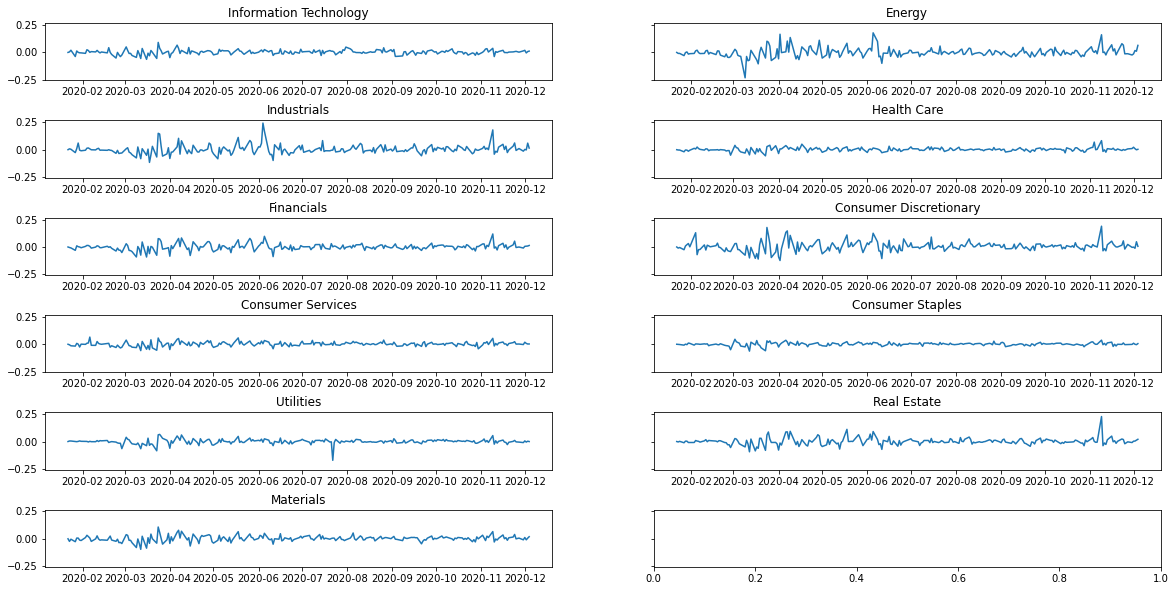

In [47]:
# plotting all the sectors, x axis = time, y axis = daily weighted returns
fig, axs = plt.subplots(6,2, sharey = True, sharex = False)
plt.subplots_adjust(hspace = 0.7)
axs[0,0].plot(df_tech['Date'], df_tech['Weighted_Daily_Return'])
axs[0,0].set_title('Information Technology')
axs[0,1].plot(df_energy['Date'], df_energy['Weighted_Daily_Return'])
axs[0,1].set_title('Energy')
axs[1,0].plot(df_ind['Date'], df_ind['Weighted_Daily_Return'])
axs[1,0].set_title('Industrials')
axs[1,1].plot(df_health['Date'], df_health['Weighted_Daily_Return'])
axs[1,1].set_title('Health Care')
axs[2,0].plot(df_fin['Date'], df_fin['Weighted_Daily_Return'])
axs[2,0].set_title('Financials')
axs[2,1].plot(df_cd['Date'], df_cd['Weighted_Daily_Return'])
axs[2,1].set_title('Consumer Discretionary')
axs[3,0].plot(df_cserv['Date'], df_cserv['Weighted_Daily_Return'])
axs[3,0].set_title('Consumer Services')
axs[3,1].plot(df_cs['Date'], df_cs['Weighted_Daily_Return'])
axs[3,1].set_title('Consumer Staples')
axs[4,0].plot(df_ut['Date'], df_ut['Weighted_Daily_Return'])
axs[4,0].set_title('Utilities')
axs[4,1].plot(df_re['Date'], df_re['Weighted_Daily_Return'])
axs[4,1].set_title('Real Estate')
axs[5,0].plot(df_mat['Date'], df_mat['Weighted_Daily_Return'])
axs[5,0].set_title('Materials')


Some observations from above: <br>
- The energy, industrials, consumer discretionary, financials  show high volatility during the pandemic <br>
- The materials, utilities, real estate and information technology sectors have medium volatility with some spikes in returns but not as frequent as the highly volatile sectors <br>
- The consumer services and consumer staples sectors show stability, with low volatility <br>
- The health care sector returns are also fairly stable, which is an interesting observation as the news of the COVID vaccine should have caused some volatility <br>
<br>

We can also see that some peaks and troughs of certain sectors <b> occur around the same time </b>. Let's take a closer look

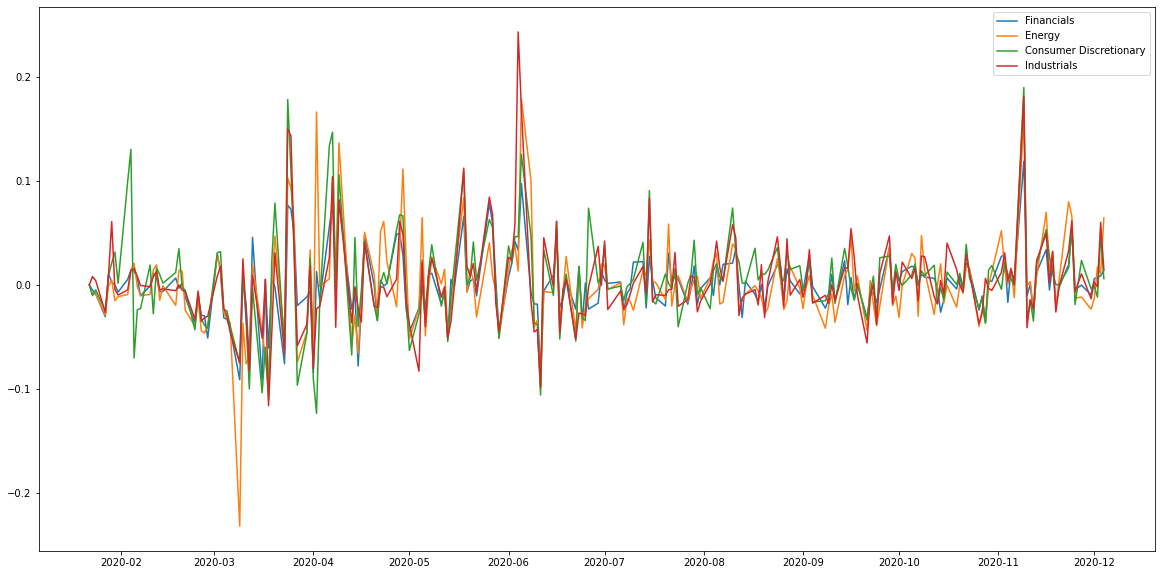

In [93]:
fig2, ax = plt.subplots()

ax.plot(df_fin['Date'],df_fin['Weighted_Daily_Return'], label = 'Financials')
ax.plot(df_energy['Date'], df_energy['Weighted_Daily_Return'], label = 'Energy')
ax.plot(df_cd['Date'], df_cd['Weighted_Daily_Return'], label = 'Consumer Discretionary')
ax.plot(df_ind['Date'], df_ind['Weighted_Daily_Return'], label = 'Industrials')
ax.legend()

plt.show()

Look at all that volatility! As we can see, the patterns of the ups and downs almost match, indicating that certain factors affect all these sectors in the same way

In [49]:
# renaming columns to make them easier to work with
df = df.rename(columns={'Confirmed US cases':'US_cases','Confirmed non-US cases':'non_US_cases','Total cases':'total_cases','Confirmed US deaths':'US_deaths','Confirmed non-US deaths':'non_US_deaths','Confirmed US recoveries':'US_recoveries','Confirmed non-US recoveries':'non_US_recoveries'})
df

,Date,US_cases,US_cases_daily_change,non_US_cases,non_US_daily_change,total_cases,US_deaths,non_US_deaths,US_recoveries,non_US_recoveries,...,Low,Close,Return,Volume,Symbol,Name,Sector,Total Volume per Sector,Volume Weights,Weighted_Daily_Return
0,2020-01-22,1,0,554,0,555,0,17,0,28,...,89.117072,89.404739,0.0000,1665800,A,Agilent Technologies Inc.,Health Care,157519400,0.010575,0.000000
1,2020-01-23,1,0,652,98,653,0,18,0,30,...,87.946567,88.353264,-0.0073,1228300,A,Agilent Technologies Inc.,Health Care,191337300,0.006420,-0.000047
2,2020-01-24,2,1,939,287,941,0,26,0,36,...,86.875253,87.549782,-0.0058,1164500,A,Agilent Technologies Inc.,Health Care,211788700,0.005498,-0.000032
3,2020-01-27,5,3,2922,1983,2927,0,82,0,61,...,85.516282,85.863464,-0.0256,1868000,A,Agilent Technologies Inc.,Health Care,198424100,0.009414,-0.000241
4,2020-01-28,5,0,5573,2651,5578,0,131,0,107,...,85.496454,86.478485,0.0036,1652200,A,Agilent Technologies Inc.,Health Care,209225700,0.007897,0.000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110869,2020-11-30,13541221,452400,49737805,1138925,63279026,268045,1200413,5146319,35413034,...,159.649994,160.380005,0.0018,4533900,ZTS,Zoetis Inc. Class A,Health Care,301575300,0.015034,0.000027
110870,2020-12-01,13721858,180637,50162127,424322,63883985,270642,1210664,5226581,35808353,...,159.990005,161.360001,0.0000,1964400,ZTS,Zoetis Inc. Class A,Health Care,227021500,0.008653,0.000000
110871,2020-12-02,13921913,200055,50608604,446477,64530517,273446,1220296,5322128,36174190,...,158.479996,158.949997,-0.0039,1529400,ZTS,Zoetis Inc. Class A,Health Care,219816700,0.006958,-0.000027
110872,2020-12-03,14139577,217664,51081463,472859,65221040,276325,1229935,5404018,36528073,...,156.440002,157.070007,-0.0170,2308200,ZTS,Zoetis Inc. Class A,Health Care,213318700,0.010820,-0.000184


In [50]:
df_cases = df.groupby('Date').max()
df_cases = df_cases.reset_index()
df_cases

,Date,US_cases,US_cases_daily_change,non_US_cases,non_US_daily_change,total_cases,US_deaths,non_US_deaths,US_recoveries,non_US_recoveries,...,Low,Close,Return,Volume,Symbol,Name,Sector,Total Volume per Sector,Volume Weights,Weighted_Daily_Return
0,2020-01-22,1,0,554,0,555,0,17,0,28,...,3887.000000,3932.000000,0.0000,156845000,ZTS,salesforce.com inc.,Utilities,437915100,0.460783,0.000000
1,2020-01-23,1,0,652,98,653,0,18,0,30,...,3930.000000,4028.239990,0.1054,104472000,ZTS,salesforce.com inc.,Utilities,455525100,0.495074,0.004990
2,2020-01-24,2,1,939,287,941,0,26,0,36,...,3951.620117,3983.600098,0.0876,146537600,ZTS,salesforce.com inc.,Utilities,576418100,0.336284,0.012874
3,2020-01-27,5,3,2922,1983,2927,0,82,0,61,...,3887.000000,3946.219971,0.0396,161940000,ZTS,salesforce.com inc.,Utilities,541919200,0.362761,0.002791
4,2020-01-28,5,0,5573,2651,5578,0,131,0,107,...,3915.929932,4030.000000,0.0641,162234000,ZTS,salesforce.com inc.,Utilities,505560500,0.415594,0.006835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2020-11-30,13541221,452400,49737805,1138925,63279026,268045,1200413,5146319,35413034,...,3950.010010,3997.179932,0.0902,169410200,ZTS,salesforce.com inc.,Utilities,685977200,0.252981,0.008960
218,2020-12-01,13721858,180637,50162127,424322,63883985,270642,1210664,5226581,35808353,...,3978.800049,3994.219971,0.0518,128166800,ZTS,salesforce.com inc.,Utilities,568889300,0.320061,0.014019
219,2020-12-02,13921913,200055,50608604,446477,64530517,273446,1220296,5322128,36174190,...,3893.000000,3899.100098,0.1102,89004200,ZTS,salesforce.com inc.,Utilities,478968100,0.383717,0.008634
220,2020-12-03,14139577,217664,51081463,472859,65221040,276325,1229935,5404018,36528073,...,3875.199951,4000.000000,0.1104,169287200,ZTS,salesforce.com inc.,Utilities,493691900,0.342901,0.037856


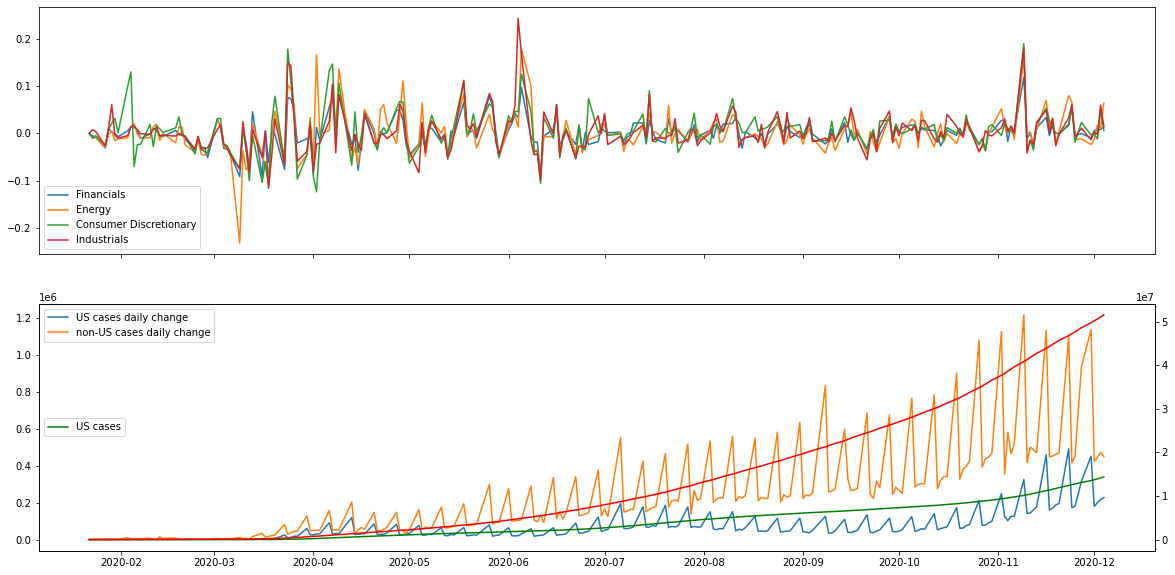

In [92]:
fig3, (ax1,ax2) = plt.subplots(2,1, sharey = False, sharex = True)
ax1.plot(df_fin['Date'],df_fin['Weighted_Daily_Return'],label = 'Financials')
ax1.plot(df_energy['Date'], df_energy['Weighted_Daily_Return'], label = 'Energy')
ax1.plot(df_cd['Date'], df_cd['Weighted_Daily_Return'], label = 'Consumer Discretionary')
ax1.plot(df_ind['Date'], df_ind['Weighted_Daily_Return'], label = 'Industrials')
ax1.legend()

ax3 = ax2.twinx()
ax2.plot(covid_daily['Date'], covid_daily['US_cases_daily_change'],label = 'US cases daily change')
ax2.plot(covid_daily['Date'], covid_daily['non_US_daily_change'],label = 'non-US cases daily change')
ax3.plot(df_cases['Date'], df_cases['US_cases'], label = 'US cases', color = 'green' )
ax3.plot(df_cases['Date'], df_cases['non_US_cases'], color = 'red')
ax2.legend()
ax3.legend(loc = 6)

Key observations:
- largest drop in daily returns was observed in march, which was the period where the S&P 500 was experiencing a stock market crash (google Coronavirus correction)
- although there is an overall increase in COVID cases over time, we can see that there is an interesting pattern, where increases in the number of cases come in spikes for both US and non-US. This is consistent with COVID-19 behaviour, as it usually appears in waves
- intial spikes of COVID 19 cases affected the market negatively as can be seen from the drop for the industries shown above. However, with further spikes, there is no continuous negative effect, as we can see that daily returns rise and fall. This can mean that COVID 19 cases may intially affect investor's perceptions negatively but over a period of time, investor trading patterns become more erratic causing increasing volatility. A cause could be due to the lack of information of how COVID 19 will actually impact the economy
- we can also see that after the intial spikes of cases, further spikes seem to have a lower impact on the magnitude of returns, indicating a less volatile market. In June-Decemeber 2020, we can see that even with greater spikes in COVID 19 cases, investor trading patterns were less affected compared to when there were lower spikes in the March-June 2020 trading period

Let's create a plot for the sectors that were less affected 

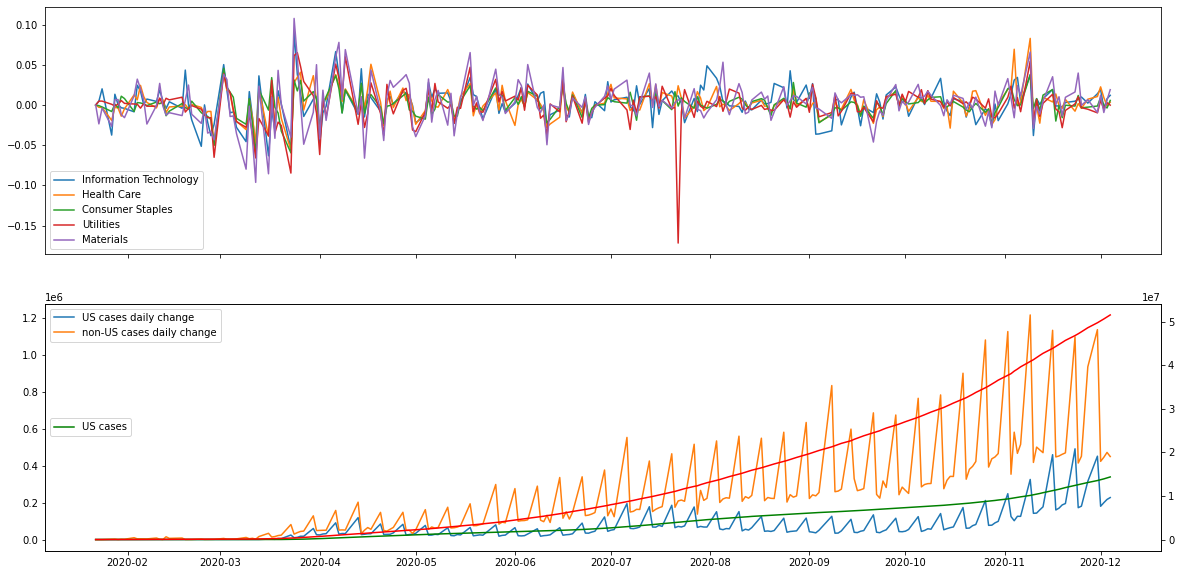

In [97]:
fig3, (ax1,ax2) = plt.subplots(2,1, sharey = False, sharex = True)
ax1.plot(df_tech['Date'],df_tech['Weighted_Daily_Return'],label = 'Information Technology')
ax1.plot(df_health['Date'], df_health['Weighted_Daily_Return'], label = 'Health Care')
ax1.plot(df_cs['Date'], df_cs['Weighted_Daily_Return'], label = 'Consumer Staples')
ax1.plot(df_ut['Date'], df_ut['Weighted_Daily_Return'], label = 'Utilities')
ax1.plot(df_mat['Date'], df_mat['Weighted_Daily_Return'], label = 'Materials')

ax1.legend()

ax3 = ax2.twinx()
ax2.plot(covid_daily['Date'], covid_daily['US_cases_daily_change'],label = 'US cases daily change')
ax2.plot(covid_daily['Date'], covid_daily['non_US_daily_change'],label = 'non-US cases daily change')
ax3.plot(df_cases['Date'], df_cases['US_cases'], label = 'US cases', color = 'green' )
ax3.plot(df_cases['Date'], df_cases['non_US_cases'], color = 'red')
ax2.legend()
ax3.legend(loc = 6)

Key observations:
- Although we can see that these sectors are impacted by the COVID 19 cases early in the year similar to the sectors shown before, the size of these changes were smaller, indicating that investor trading patterns for these sectors are more stable
- we can also see that these sectors do not have a large spike around June 2020, which was when the US had declared that it was opening its economy. this indiciates that these industries were not impacted economically by the affects of increasing COVID 19 cases